In [2]:
library(gdata)

gdata: read.xls support for 'XLS' (Excel 97-2004) files ENABLED.

gdata: read.xls support for 'XLSX' (Excel 2007+) files ENABLED.

Attaching package: 'gdata'

The following object is masked from 'package:stats':

    nobs

The following object is masked from 'package:utils':

    object.size

The following object is masked from 'package:base':

    startsWith



In [3]:
setwd("C:/Users/dheer/Desktop/UTD/4-Spring 2017/R for Data Scientists/Assignment/7")

In [4]:
perl = "C:/Strawberry/perl/bin/perl5.24.1.exe"
credit_card <- read.xls("default of credit card clients.xls", perl = perl, header = TRUE)

In [5]:
credit_card <- credit_card[-1,]

In [6]:
credit_card$X <- NULL

In [7]:
dim(credit_card)

[1] 30000    24

In [8]:
summary(credit_card)

       X1          X2              X3               X4              X5       
 50000  : 3365   1  :11888   2      :14030   0       :   54   29     : 1605  
 20000  : 1976   2  :18112   1      :10585   1       :13659   27     : 1477  
 30000  : 1610   SEX:    0   3      : 4917   2       :15964   28     : 1409  
 80000  : 1567               5      :  280   3       :  323   30     : 1395  
 200000 : 1528               4      :  123   MARRIAGE:    0   26     : 1256  
 150000 : 1110               6      :   51                    31     : 1217  
 (Other):18844               (Other):   14                    (Other):21641  
       X6              X7              X8              X9       
 0      :14737   0      :15730   0      :15764   0      :16455  
 -1     : 5686   -1     : 6050   -1     : 5938   -1     : 5687  
 1      : 3688   2      : 3927   -2     : 4085   -2     : 4348  
 -2     : 2759   -2     : 3782   2      : 3819   2      : 3159  
 2      : 2667   3      :  326   3      :  240   3 

### We will try with other file

In [9]:
library(readr)
default_of_credit_card_clients <- read_delim("C:/Users/dheer/Desktop/UTD/4-Spring 2017/R for Data Scientists/Assignment/7/default of credit card clients.txt", "\t", escape_double = FALSE, trim_ws = TRUE)

Warning message:
"Missing column names filled in: 'X1' [1]"Warning message:
"Duplicated column names deduplicated: 'X1' => 'X1_1' [2]"Parsed with column specification:
cols(
  .default = col_integer()
)
See spec(...) for full column specifications.


In [10]:
credit_card <- default_of_credit_card_clients
credit_card$X1 <- NULL
colnames(credit_card)[1] <- c("X1")

In [11]:
dim(credit_card)

[1] 30000    24

In [12]:
summary(credit_card)

       X1                X2              X3              X4       
 Min.   :  10000   Min.   :1.000   Min.   :0.000   Min.   :0.000  
 1st Qu.:  50000   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.000  
 Median : 140000   Median :2.000   Median :2.000   Median :2.000  
 Mean   : 167484   Mean   :1.604   Mean   :1.853   Mean   :1.552  
 3rd Qu.: 240000   3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:2.000  
 Max.   :1000000   Max.   :2.000   Max.   :6.000   Max.   :3.000  
       X5              X6                X7                X8         
 Min.   :21.00   Min.   :-2.0000   Min.   :-2.0000   Min.   :-2.0000  
 1st Qu.:28.00   1st Qu.:-1.0000   1st Qu.:-1.0000   1st Qu.:-1.0000  
 Median :34.00   Median : 0.0000   Median : 0.0000   Median : 0.0000  
 Mean   :35.49   Mean   :-0.0167   Mean   :-0.1338   Mean   :-0.1662  
 3rd Qu.:41.00   3rd Qu.: 0.0000   3rd Qu.: 0.0000   3rd Qu.: 0.0000  
 Max.   :79.00   Max.   : 8.0000   Max.   : 8.0000   Max.   : 8.0000  
       X9               X10       

In [13]:
credit_card$X2 <- as.factor(credit_card$X2)
credit_card$X3 <- as.factor(credit_card$X3)
credit_card$X4 <- as.factor(credit_card$X4)

In [14]:
levels(credit_card$X3) <- c("1","1","2","3","4","4","4")
levels(credit_card$X4) <- c("1","1","2","3")

In [15]:
summary(credit_card)

       X1          X2        X3        X4              X5       
 Min.   :  10000   1:11888   1:10599   1:13713   Min.   :21.00  
 1st Qu.:  50000   2:18112   2:14030   2:15964   1st Qu.:28.00  
 Median : 140000             3: 4917   3:  323   Median :34.00  
 Mean   : 167484             4:  454             Mean   :35.49  
 3rd Qu.: 240000                                 3rd Qu.:41.00  
 Max.   :1000000                                 Max.   :79.00  
       X6                X7                X8                X9         
 Min.   :-2.0000   Min.   :-2.0000   Min.   :-2.0000   Min.   :-2.0000  
 1st Qu.:-1.0000   1st Qu.:-1.0000   1st Qu.:-1.0000   1st Qu.:-1.0000  
 Median : 0.0000   Median : 0.0000   Median : 0.0000   Median : 0.0000  
 Mean   :-0.0167   Mean   :-0.1338   Mean   :-0.1662   Mean   :-0.2207  
 3rd Qu.: 0.0000   3rd Qu.: 0.0000   3rd Qu.: 0.0000   3rd Qu.: 0.0000  
 Max.   : 8.0000   Max.   : 8.0000   Max.   : 8.0000   Max.   : 8.0000  
      X10               X11       

## Logistic Regression

In [16]:
attach(credit_card)
credit.model <- glm(Y~.,data = credit_card, family = binomial)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

In [17]:
summary(credit.model)


Call:
glm(formula = Y ~ ., family = binomial, data = credit_card)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1360  -0.7018  -0.5444  -0.2857   3.8689  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -9.973e-01  8.650e-02 -11.530  < 2e-16 ***
X1          -7.046e-07  1.578e-07  -4.466 7.98e-06 ***
X22         -1.130e-01  3.072e-02  -3.679 0.000235 ***
X32         -8.304e-02  3.557e-02  -2.334 0.019574 *  
X33         -1.132e-01  4.758e-02  -2.380 0.017322 *  
X34         -1.135e+00  1.888e-01  -6.009 1.87e-09 ***
X42         -1.848e-01  3.461e-02  -5.340 9.28e-08 ***
X43         -7.429e-02  1.374e-01  -0.541 0.588644    
X5           5.557e-03  1.860e-03   2.988 0.002812 ** 
X6           5.773e-01  1.771e-02  32.604  < 2e-16 ***
X7           8.141e-02  2.019e-02   4.032 5.54e-05 ***
X8           7.094e-02  2.260e-02   3.138 0.001699 ** 
X9           2.269e-02  2.500e-02   0.908 0.364023    
X10          3.437e-02  2.688e-02 

In [18]:
credit.model <- glm(Y~.-X3 -X9 -X10 -X11 -X14 -X15 -X16 -X17,data = credit_card, family = binomial)
summary(credit.model)


Call:
glm(formula = Y ~ . - X3 - X9 - X10 - X11 - X14 - X15 - X16 - 
    X17, family = binomial, data = credit_card)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1397  -0.6993  -0.5471  -0.2949   3.9167  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.073e+00  8.146e-02 -13.167  < 2e-16 ***
X1          -6.054e-07  1.501e-07  -4.034 5.48e-05 ***
X22         -1.160e-01  3.064e-02  -3.786 0.000153 ***
X42         -1.705e-01  3.412e-02  -4.997 5.83e-07 ***
X43         -8.586e-02  1.370e-01  -0.627 0.530820    
X5           4.883e-03  1.807e-03   2.703 0.006873 ** 
X6           5.848e-01  1.755e-02  33.315  < 2e-16 ***
X7           8.833e-02  1.997e-02   4.423 9.72e-06 ***
X8           1.090e-01  1.856e-02   5.873 4.28e-09 ***
X12         -5.848e-06  1.129e-06  -5.180 2.22e-07 ***
X13          4.512e-06  1.176e-06   3.836 0.000125 ***
X18         -1.453e-05  2.295e-06  -6.332 2.42e-10 ***
X19         -7.303e-06  1.789e-06  -4.

In [19]:
train <- sample(nrow(credit_card), 0.7*nrow(credit_card))
credit.model_2 <- glm(Y~.-X3 -X9 -X10 -X11 -X14 -X15 -X16 -X17 -X20,data = credit_card, family = binomial, subset = train)
summary(credit.model_2)


Call:
glm(formula = Y ~ . - X3 - X9 - X10 - X11 - X14 - X15 - X16 - 
    X17 - X20, family = binomial, data = credit_card, subset = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1403  -0.7003  -0.5455  -0.2924   3.9866  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.093e+00  9.799e-02 -11.151  < 2e-16 ***
X1          -6.839e-07  1.790e-07  -3.820 0.000133 ***
X22         -1.061e-01  3.667e-02  -2.893 0.003812 ** 
X42         -1.723e-01  4.096e-02  -4.207 2.59e-05 ***
X43         -3.984e-02  1.628e-01  -0.245 0.806639    
X5           5.822e-03  2.164e-03   2.691 0.007127 ** 
X6           5.802e-01  2.104e-02  27.574  < 2e-16 ***
X7           9.024e-02  2.393e-02   3.771 0.000163 ***
X8           1.270e-01  2.223e-02   5.714 1.10e-08 ***
X12         -7.141e-06  1.381e-06  -5.171 2.32e-07 ***
X13          5.605e-06  1.436e-06   3.903 9.48e-05 ***
X18         -1.522e-05  2.743e-06  -5.548 2.89e-08 ***
X19         -6.3

In [20]:
credit.model_3 <- glm(Y~.-X3 -X4 -X9 -X10 -X11 -X14 -X15 -X16 -X17 -X20 -X21 -X23,data = credit_card, family = binomial, subset = train)
summary(credit.model_3)


Call:
glm(formula = Y ~ . - X3 - X4 - X9 - X10 - X11 - X14 - X15 - 
    X16 - X17 - X20 - X21 - X23, family = binomial, data = credit_card, 
    subset = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1756  -0.6994  -0.5473  -0.3002   3.7995  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.353e+00  7.673e-02 -17.629  < 2e-16 ***
X1          -7.141e-07  1.762e-07  -4.052 5.07e-05 ***
X22         -9.030e-02  3.646e-02  -2.477 0.013264 *  
X5           1.017e-02  1.897e-03   5.362 8.22e-08 ***
X6           5.825e-01  2.103e-02  27.699  < 2e-16 ***
X7           9.099e-02  2.391e-02   3.805 0.000142 ***
X8           1.275e-01  2.224e-02   5.735 9.77e-09 ***
X12         -7.460e-06  1.380e-06  -5.406 6.45e-08 ***
X13          5.802e-06  1.438e-06   4.035 5.45e-05 ***
X18         -1.601e-05  2.759e-06  -5.804 6.48e-09 ***
X19         -6.857e-06  2.005e-06  -3.420 0.000625 ***
X22         -3.025e-06  1.764e-06  -1.715 0.08632

In [21]:
credit.pred <- rep(0, 9000)
credit.probs <- predict(credit.model_2, credit_card[-train,], type = "response")
credit.pred[credit.probs > .5] <- 1
table(credit_card[-train,]$Y, credit.pred)

   credit.pred
       0    1
  0 6814  219
  1 1485  482

#### The above model predicted about 81.02% of the data.

In [22]:
credit.pred <- rep(0, 9000)
credit.probs <- predict(credit.model_3, credit_card[-train,], type = "response")
credit.pred[credit.probs > .5] <- 1
table(credit_card[-train,]$Y, credit.pred)

   credit.pred
       0    1
  0 6818  215
  1 1486  481

#### The best is 81.11%

In [23]:
credit.model_few <- glm(Y~X5+X6+X8+X18+X19,data = credit_card, family = binomial, subset = train)
credit.pred <- rep(0, 9000)
credit.probs <- predict(credit.model_few, credit_card[-train,], type = "response")
credit.pred[credit.probs > .5] <- 1
table(credit_card[-train,]$Y, credit.pred)

   credit.pred
       0    1
  0 6848  185
  1 1537  430

#### The above has 80.7%

In [24]:
credit.pred <- rep(0, 9000)
credit.pred[credit.probs > .6] <- 1
table(credit_card[-train,]$Y, credit.pred)

   credit.pred
       0    1
  0 6958   75
  1 1803  164

In [25]:
credit.pred <- rep(0, 9000)
credit.pred[credit.probs > .55] <- 1
table(credit_card[-train,]$Y, credit.pred)

   credit.pred
       0    1
  0 6896  137
  1 1633  334

#### The above is about 79.8%

In [26]:
credit.pred <- rep(0, 9000)
credit.pred[credit.probs > .4] <- 1
table(credit_card[-train,]$Y, credit.pred)

   credit.pred
       0    1
  0 6583  450
  1 1173  794

#### The above is about 81.87%

In [27]:
credit.pred <- rep(0, 9000)
credit.pred[credit.probs > .33] <- 1
table(credit_card[-train,]$Y, credit.pred)

   credit.pred
       0    1
  0 6459  574
  1 1097  870

#### The above is 81.37%

## Now let's try PCA

In [28]:
credit_card.mm <- model.matrix(Y~. -1, data = credit_card)

In [29]:
pca_credit <- prcomp(credit_card.mm, scale. = TRUE)

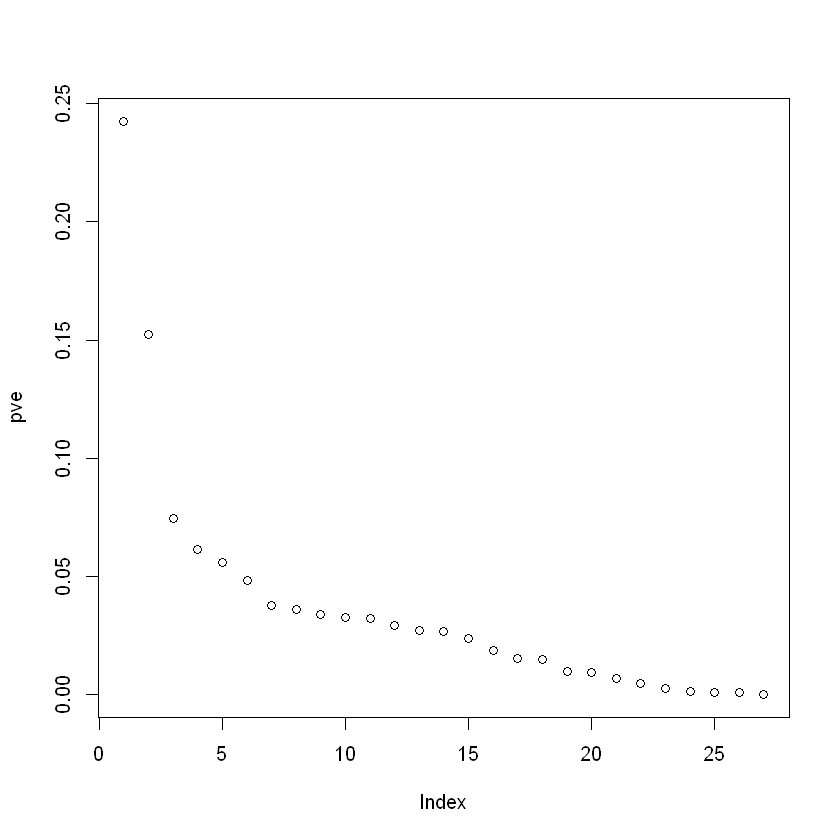

In [30]:
pcaVar <- pca_credit$sdev^2
pve = pcaVar / sum(pcaVar)
plot(pve)

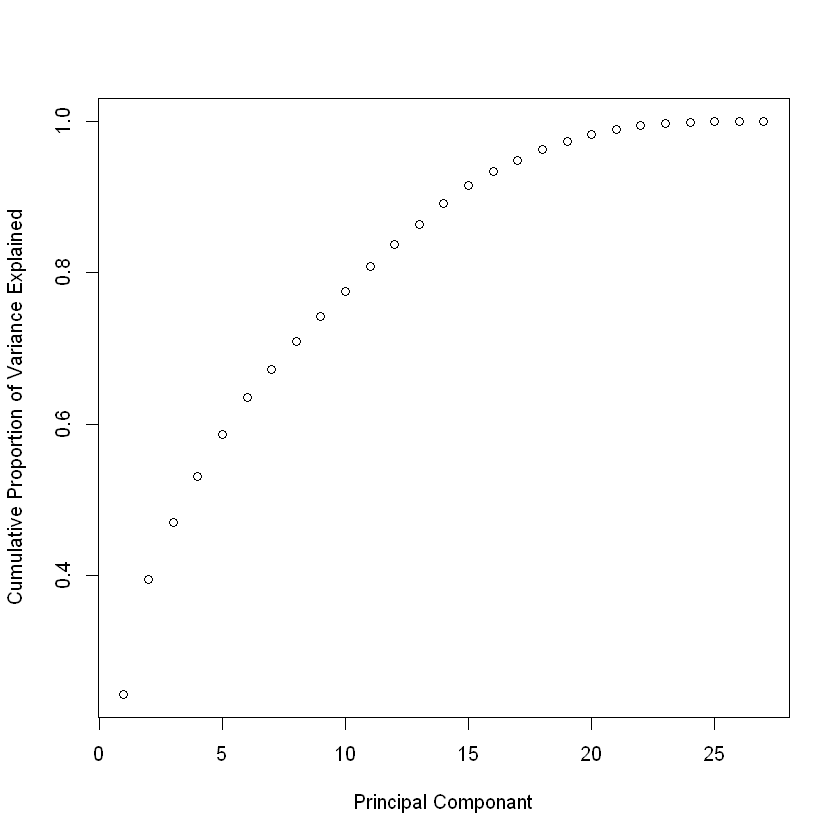

In [31]:
plot(cumsum(pve), xlab = "Principal Componant", ylab = "Cumulative Proportion of Variance Explained")

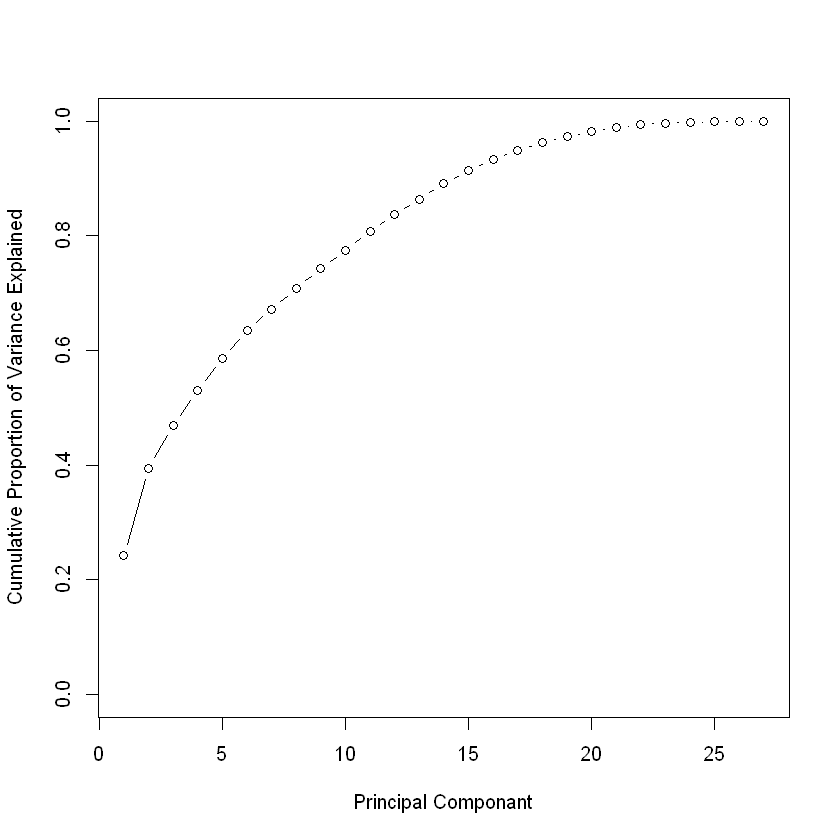

In [32]:
plot(cumsum(pve), xlab = "Principal Componant", ylab = "Cumulative Proportion of Variance Explained", ylim = c(0,1), type = 'b')

#### From above PCA plot, we see that adding more variables is incresing its variance.

## LDA

In [33]:
library(MASS)

In [34]:
credit.lda = lda(credit_card$Y ~., data = credit_card)
summary(credit.lda)

        Length Class  Mode     
prior    2     -none- numeric  
counts   2     -none- numeric  
means   52     -none- numeric  
scaling 26     -none- numeric  
lev      2     -none- character
svd      1     -none- numeric  
N        1     -none- numeric  
call     3     -none- call     
terms    3     terms  call     
xlevels  3     -none- list     

In [35]:
credit.lda

Call:
lda(credit_card$Y ~ ., data = credit_card)

Prior probabilities of groups:
     0      1 
0.7788 0.2212 

Group means:
        X1       X22       X32       X33         X34       X42        X43
0 178099.7 0.6141500 0.4579695 0.1575073 0.018019175 0.5402756 0.01022941
1 130109.7 0.5670585 0.5018083 0.1864075 0.004972875 0.5034659 0.01265823
        X5         X6         X7         X8         X9        X10        X11
0 35.41727 -0.2112224 -0.3019175 -0.3162558 -0.3556326 -0.3894881 -0.4056240
1 35.72574  0.6681736  0.4582580  0.3621157  0.2545208  0.1678722  0.1121157
       X12      X13      X14      X15      X16      X17      X18      X19
0 51994.23 49717.44 47533.37 43611.17 40530.45 39042.27 6307.337 6640.465
1 48509.16 47283.62 45181.60 42036.95 39540.19 38271.44 3397.044 3388.650
       X20      X21     X22      X23
0 5753.497 5300.529 5248.22 5719.372
1 3367.352 3155.627 3219.14 3441.482

Coefficients of linear discriminants:
              LD1
X1  -6.050991e-07
X22 -1.097965e

In [36]:
train <- sample(nrow(credit_card), 0.7*nrow(credit_card))
credit.lda <- lda(credit_card$Y~.,data = credit_card, subset = train)
credit.pred = predict(credit.lda, credit_card[-train,])
credit.class <- credit.pred$class
table(credit.class, credit_card[-train,]$Y)

            
credit.class    0    1
           0 6755 1525
           1  190  530

In [37]:
mean(credit.class == credit_card[-train,]$Y)

[1] 0.8094444

## QDA

In [38]:
train <- sample(nrow(credit_card), 0.7*nrow(credit_card))
credit.qda = qda(credit_card$Y~., data = credit_card, subset = train)
credit.qda

Call:
qda(credit_card$Y ~ ., data = credit_card, subset = train)

Prior probabilities of groups:
        0         1 
0.7760952 0.2239048 

Group means:
        X1       X22       X32       X33         X34       X42        X43
0 177304.6 0.6155970 0.4588293 0.1599583 0.017425451 0.5396368 0.01049208
1 130369.6 0.5669928 0.5034028 0.1843896 0.004891536 0.5068056 0.01254785
        X5         X6         X7         X8         X9        X10        X11
0 35.43987 -0.2167751 -0.3076451 -0.3210823 -0.3620076 -0.3991287 -0.4104798
1 35.66972  0.6658869  0.4472565  0.3543173  0.2460655  0.1599319  0.1078265
       X12      X13      X14      X15      X16      X17      X18      X19
0 51697.20 49413.25 47204.89 43387.61 40225.63 38850.26 6271.822 6645.917
1 48998.95 47590.73 45305.42 42066.95 39544.16 38310.98 3299.872 3358.687
       X20      X21      X22      X23
0 5752.481 5275.992 5215.305 5647.508
1 3174.787 3250.061 3334.530 3457.929

In [39]:
credit.class <- predict(credit.qda, credit_card[-train,])
table(credit.class$class, credit_card[-train,]$Y)

   
       0    1
  0 2101  231
  1 4965 1703

In [40]:
mean(credit.class$class == credit_card[-train,]$Y)

[1] 0.4226667

## Naive Bayes

In [43]:
library(e1071)

Warning message:
"package 'e1071' was built under R version 3.3.3"

In [46]:
newData <- cbind(credit_card[,"X2"], credit_card[,"X3"], credit_card[,"X4"], credit_card[,"X5"], credit_card[,"Y"])

In [47]:
newData$X5 <- NULL

In [48]:
newData[,4] = as.factor(newData[,4])

In [49]:
summary(newData)

 X2        X3        X4        Y        
 1:11888   1:10599   1:13713   0:23364  
 2:18112   2:14030   2:15964   1: 6636  
           3: 4917   3:  323            
           4:  454                      

In [50]:
train <- sample(30000, 24000)

In [51]:
nb.model <- naiveBayes(newData$Y~., data = newData, subset = train)

In [52]:
nb.pred <- predict(nb.model, newData[-train, -4])

In [53]:
table(nb.pred,newData[-train, 4])

       
nb.pred    0    1
      0 4637 1363
      1    0    0

#### 77.2%

In [54]:
newData <- cbind(credit_card[,"X2"], credit_card[,"X3"], credit_card[,"X4"], credit_card[,"X5"], credit_card[,"Y"])

In [55]:
newData[,5] = as.factor(newData[,5])

In [56]:
train <- sample(30000, 24000)

In [57]:
nb.model <- naiveBayes(newData$Y~., data = newData, subset = train)
nb.pred <- predict(nb.model, newData[-train, -5])
table(nb.pred,newData[-train, 5])

       
nb.pred    0    1
      0 4654 1345
      1    1    0

#### 77.5%

In [58]:
newData <- cbind(credit_card[,"X1"],credit_card[,"X2"], credit_card[,"X4"], credit_card[,"X5"],credit_card[,"X6"],credit_card[,"X7"],credit_card[,"X12"],credit_card[,"X18"],credit_card[,"X19"], credit_card[,"Y"])

In [59]:
newData[,10] <- as.factor(newData[,10])

In [60]:
train <- sample(30000, 24000)

In [61]:
nb.model <- naiveBayes(newData$Y~., data = newData, subset = train)

In [62]:
nb.pred <- predict(nb.model, newData[-train, -10])

In [63]:
table(nb.pred,newData[-train, 10])

       
nb.pred    0    1
      0 4093  623
      1  624  660

#### 79.2%